## Домашнее задание 6 (Марковские цепи)



Задание

1. Скачайте текст произведения «Война и мир»: ссылка на GitHub.
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.
4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

# 1. Исходные данные: текст  «Война и мир»: 4 тома

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [ ]:
def text_from_file(filename):

    with open(filename, 'r') as f:
        text = f.read().lower()

    return text

In [ ]:
text1 = text_from_file('tom_1.txt')
text2 = text_from_file('tom_2.txt')
text3 = text_from_file('tom_3.txt')
text4 = text_from_file('tom_4.txt')

In [ ]:
text_all = text1 + text2 + text3 + text4

In [ ]:
text_all[15000:15200]

'нее, казалось, что они сами делаются похожи на нее, побыв и поговорив несколько времени с ней. кто говорил с ней и видел при каждом слове ее светлую улыбочку и блестящие белые зубы, которые виднелись '

# 2. Очистка текста, оставляем только буквы русского алфавита ,без пробела

In [ ]:
text_clear = re.sub('[^а-я]','', text_all)

# 3. Матрица переходных вероятностей

In [ ]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'

POS = {l: i for i, l in enumerate(RUSSIAN)}

In [ ]:
POS['р']

16

In [ ]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
probabilities.shape

(32, 32)

In [ ]:
for cp, cn in zip(text_clear[:-1], text_clear[1:]):

    probabilities[POS[cp], POS[cn]] += 1

In [ ]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [ ]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

In [ ]:
# Матрица переходных вероятностей от одной буквы к другой букве
df

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.003376,0.018440,0.067412,0.018196,0.037984,0.020962,0.018541,0.061972,0.019512,0.009135,...,0.001614,0.016949,0.019401,0.003461,0.000000,0.000000,0.000000,0.004209,0.010945,0.036668
б,0.065845,0.000900,0.006102,0.000775,0.001701,0.142343,0.000550,0.000250,0.050415,0.000000,...,0.000200,0.001776,0.000350,0.013454,0.006777,0.272507,0.002501,0.002376,0.000275,0.029559
в,0.141206,0.005609,0.010091,0.008625,0.016593,0.115528,0.001297,0.015362,0.086590,0.000009,...,0.000930,0.004773,0.031184,0.000179,0.000338,0.063777,0.004134,0.006793,0.000056,0.005853
г,0.056614,0.001987,0.006072,0.000861,0.066241,0.031531,0.000442,0.002363,0.046281,0.000000,...,0.000132,0.002164,0.000486,0.000000,0.000000,0.000066,0.000110,0.000486,0.000199,0.000420
д,0.165688,0.002681,0.040610,0.002142,0.002383,0.171745,0.000780,0.001560,0.099234,0.000014,...,0.005816,0.002312,0.004936,0.000028,0.006553,0.023404,0.015262,0.000879,0.001660,0.016326
е,0.002370,0.028272,0.044181,0.055789,0.048848,0.027982,0.017762,0.024841,0.019267,0.035171,...,0.003500,0.019789,0.010515,0.008694,0.000000,0.000000,0.000000,0.003584,0.003869,0.006830
ж,0.149182,0.006814,0.002203,0.001999,0.082589,0.411597,0.002203,0.000694,0.152242,0.000000,...,0.000000,0.004815,0.000041,0.000000,0.000000,0.000000,0.004489,0.001224,0.003142,0.000653
з,0.358179,0.014157,0.060382,0.029455,0.050512,0.017379,0.011569,0.007129,0.026258,0.000025,...,0.000584,0.002512,0.001421,0.000076,0.001066,0.038030,0.040669,0.002461,0.004592,0.031992
и,0.004689,0.021709,0.076959,0.018173,0.042316,0.054686,0.009615,0.042432,0.036045,0.021523,...,0.020883,0.030844,0.008110,0.002594,0.000006,0.000000,0.000013,0.003908,0.006124,0.034399
й,0.015283,0.032273,0.066757,0.029325,0.067261,0.011404,0.014624,0.015632,0.060047,0.000233,...,0.006168,0.031187,0.018270,0.000310,0.000000,0.000000,0.000000,0.006245,0.000388,0.006323


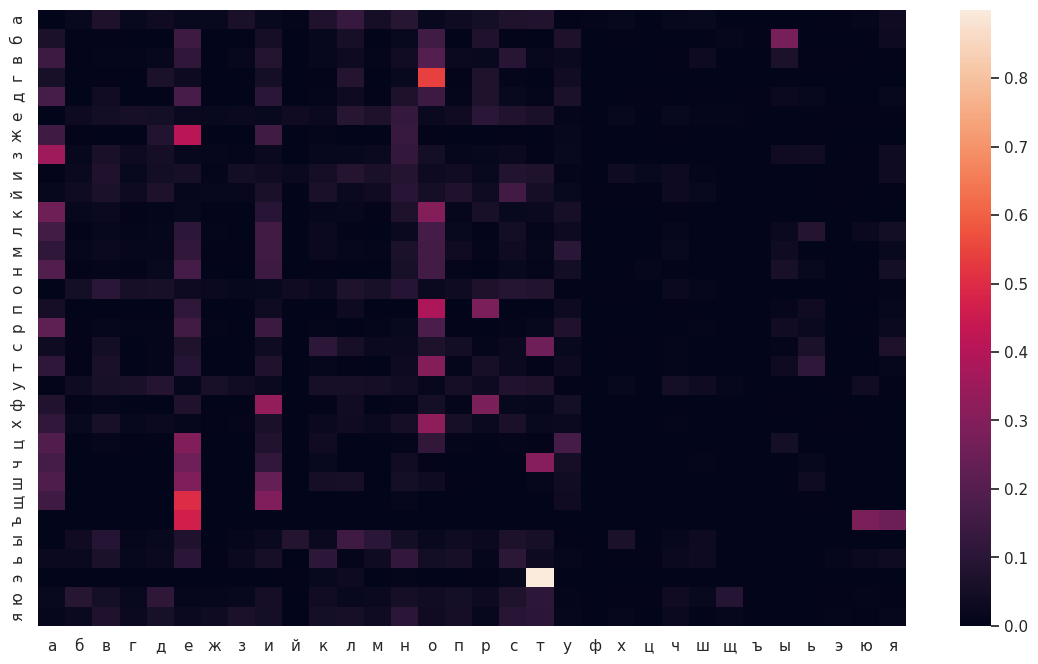

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

# 4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [ ]:
def proba_4_letters(letter_start, letter_end):

  start = POS[letter_start]
  end = POS[letter_end]
  prior = 1. / len(RUSSIAN)
  proba = 0

  for c1 in RUSSIAN:
    for c2 in RUSSIAN:

      proba_point = probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]]* probabilities[POS[c2], end]
      proba += proba_point

  proba = proba * prior
  return proba


In [ ]:
print('Вероятность слова из четырех символов, c заданным началом и концом:', proba_4_letters('п','р'))

Вероятность слова из четырех символов, c заданным началом и концом: 0.0013339265989638827


In [ ]:
print('Вероятность слова из четырех символов, c заданным началом и концом:', proba_4_letters('т','я'))


Вероятность слова из четырех символов, c заданным началом и концом: 0.0007059946494778937


# 5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [ ]:
s = []

start = 'б'
s.append(start)

length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бчтебыйш


# 6. Оценка ряда через модель HMM

In [ ]:
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")


In [ ]:
# Загрузка данных
series = mean_monthly_temp.dropna()

series_values = series.values[:, 1]
series_time = series.values[:, 0]

# Ось X - ось времени
t = np.arange(0, len(series_time))

In [ ]:
!pip3 install hmmlearn

In [ ]:
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

In [ ]:
values = series_values.reshape(-1,1)

In [ ]:
np.random.seed(1)

In [ ]:
# Количество n_components - количество состояний в которые может переходить марковский процесс
# covariance_type="diag" : Ковариации между координатами нет, форма распределения вокруг состояния - круг
# т.е. многомерное гауссовское распределение

for n in range(1, 30):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=2000)
    model.fit(values)
    print (n, model.score(values))

1 -855.6201905961935
2 -767.9291047567314
3 -737.7577140587579
4 -717.4009996200712
5 -701.1675120676488
6 -637.0628030952781
7 -646.7960074046584
8 -645.2487641395409
9 -614.5966608150954
10 -577.0846546807102
11 -591.7537554085003
12 -585.9925948083207
13 -590.6563554302523


14 -541.8045394288241


15 -568.4967501722767
16 -535.9233792863542


17 -518.0642451988152


18 -539.7715898358637


19 -545.5032997332786
20 -538.2220568489348


21 -512.6529325989077


22 -531.379106020044


23 -523.5866901898349


24 -502.10096942971927


25 -542.2147729441319


26 -490.7899963268567


27 -503.9023105535905


28 -479.7364426198221
29 -484.73918894371246


При увеличении числа компонент более 13, выдается предупреждение о возможном переобучении модели, так как данных всего 240. Используем количество компонент = 10, так как здесь достигается наибольший score модели

In [ ]:
# Оценка сходимости: зависимость score модели от количества итераций

negative_infinity = float('-inf')

best_score = negative_infinity
best_iter = 0

n_components_=10

for iter_level in range(1, 100, 1):

    tmp_model = GaussianHMM(n_components=n_components_,
                        covariance_type="diag",
                        n_iter=iter_level*100)

    tmp_model.fit(values)
    tmp_score = tmp_model.score(values)

    if tmp_score > best_score:
        best_score = tmp_score
        best_iter = iter_level
        print('Число итераций', best_iter*100, 'Model score', best_score)



Число итераций 100 Model score -633.7182036241411
Число итераций 200 Model score -618.4687041049515
Число итераций 300 Model score -573.7894709820353
Число итераций 2600 Model score -573.7206015016707
Число итераций 3100 Model score -566.6170642829554
Число итераций 5800 Model score -563.5805784267816
Число итераций 6000 Model score -561.5602189169831


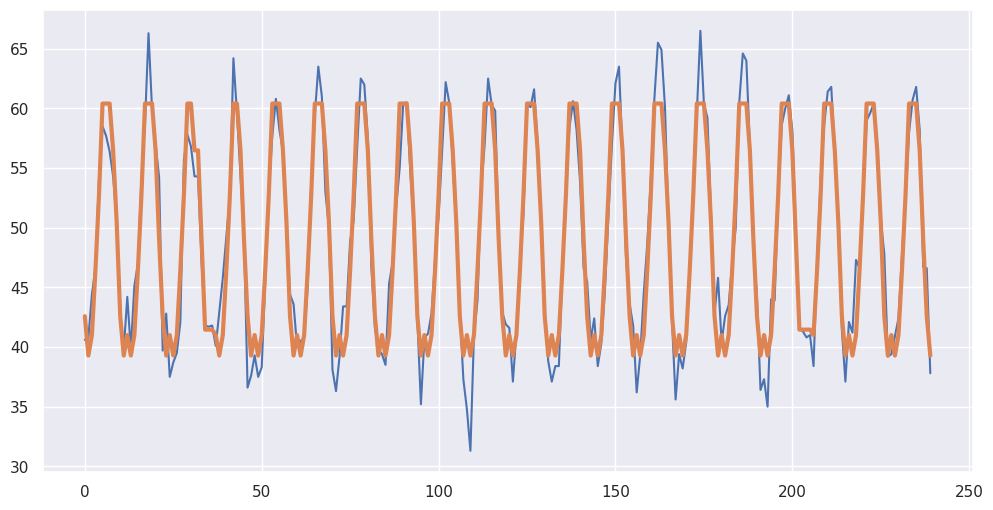

In [ ]:
# Оптимальное число итераций для сходимости модели 6000
# Сравнение графика истинных значений с полученными моделью оценками
# марковского состояния (истинное среднее без учета гауссовского разброса)

model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=6000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [ ]:
# Предсказанные метки точек
labels

array([5.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.00, 0.00, 6.00, 7.00, 5.00,
       8.00, 9.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.00, 0.00, 6.00, 2.00,
       5.00, 8.00, 9.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.00, 6.00, 6.00,
       2.00, 3.00, 3.00, 3.00, 9.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.00,
       6.00, 2.00, 5.00, 8.00, 9.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.00,
       0.00, 6.00, 7.00, 5.00, 8.00, 9.00, 8.00, 9.00, 4.00, 1.00, 0.00,
       0.00, 0.00, 6.00, 7.00, 5.00, 8.00, 9.00, 8.00, 9.00, 4.00, 1.00,
       0.00, 0.00, 0.00, 6.00, 2.00, 5.00, 8.00, 9.00, 8.00, 9.00, 4.00,
       1.00, 0.00, 0.00, 0.00, 6.00, 7.00, 5.00, 8.00, 9.00, 8.00, 9.00,
       4.00, 1.00, 0.00, 0.00, 0.00, 6.00, 7.00, 5.00, 8.00, 9.00, 8.00,
       9.00, 4.00, 1.00, 0.00, 0.00, 0.00, 6.00, 2.00, 5.00, 8.00, 9.00,
       8.00, 9.00, 4.00, 1.00, 0.00, 0.00, 0.00, 6.00, 7.00, 5.00, 8.00,
       9.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.00, 0.00, 6.00, 2.00, 5.00,
       8.00, 9.00, 8.00, 9.00, 4.00, 1.00, 0.00, 0.

In [ ]:
# Распределение наблюдений по скрытым состояниям

means_df = pd.DataFrame(means)
means_df.value_counts()

60.404144    58
40.999388    38
39.284970    37
56.479983    21
46.459314    20
52.734274    20
42.582423    19
48.941211    10
50.462134    10
41.455496     7
Name: count, dtype: int64

In [ ]:
# Получена матрица переходов из состояния в состояние (10 шт для n = 10 компонент)
0
print('Размер матрицы переходов', model.transmat_.shape)

# Настройка читаемости вывода для матрицы переходов
np.set_printoptions(precision=2, suppress=True, formatter={'all': lambda x: f'{x:0.2f}'})

# Матрица переходов из состояния в состояние

transmat_matrix = model.transmat_
print(transmat_matrix)

Размер матрицы переходов (10, 10)
[[0.65 0.00 0.00 0.00 0.00 0.00 0.35 0.00 0.00 0.00]
 [1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.15 0.00 0.85 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.70 0.00 0.00 0.00 0.00 0.00 0.30]
 [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00]
 [0.00 0.00 0.58 0.00 0.00 0.00 0.09 0.33 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00]
 [0.00 0.00 0.00 0.00 0.52 0.00 0.00 0.00 0.48 0.00]]


Матрица переходов не диагональная, что говорит о ковариации компонент

## Прогноз ряда на 10 измерений вперед (через среднее каждой компоненты)

In [ ]:
# Генерируем продолжение временного ряда для обученной модели

df_series = pd.DataFrame(values)

# Количество прогнозных значений
forcast_num_values = 10

# Start / End indexes
forcast_start_index = len(df_series)
forcast_end_index = forcast_num_values + len(df_series)


# Генерация прогноза
forecast = model.sample(forcast_num_values)

forecast_values = forecast[0]

df_forecast_values = pd.DataFrame(forecast_values)

df_forecast_values.index = range(forcast_start_index,forcast_end_index,1)


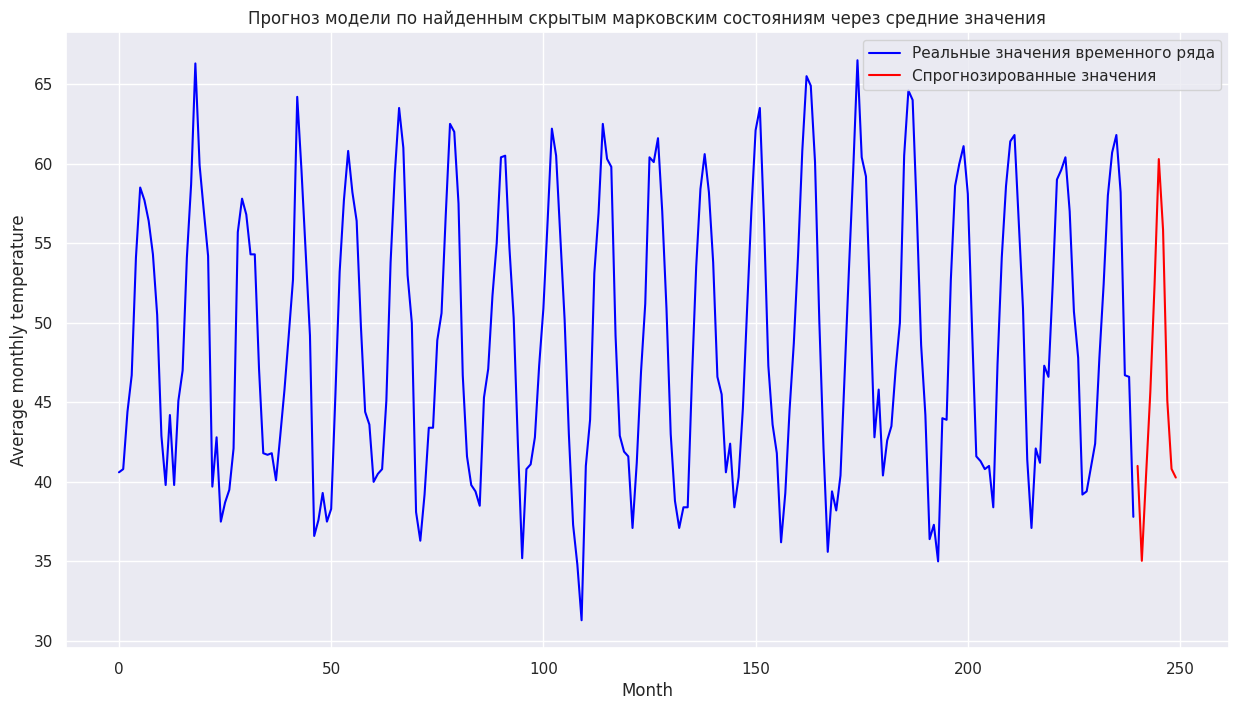

In [ ]:
# Графики исходный датасет + прогноз моделью HMM

plt.figure(figsize=(15,8))

plt.plot(df_series.index, df_series, label='Реальные значения временного ряда', color='blue')

plt.plot(df_forecast_values.index, df_forecast_values, label='Спрогнозированные значения', color='red')

plt.title('Прогноз модели по найденным скрытым марковским состояниям через средние значения')
plt.xlabel('Month')
plt.ylabel('Average monthly temperature')
plt.legend()

plt.show()

# Итоги:
1. Для анализа выбран временной ряд среднемесячных температур
"mean-monthly-air-temperature-deg.csv"

2. Построена модель HMM  (скрытого марковского процесса с предположением о гауссовском распределении значений ряда вокруг средних значений скрытого марковского процесса состояний (например, можно предположить что для июня месяца характерна температура 27 градусов с некоторым равномерным разбросом значений вокруг)

3. Найдено оптимальное количество компонент при котором достигается максимальное правдоподобие, n =10, что близко к количеству месяцев 12 (сезонность)

4. Для количества компонент = 10, найдено оптимальное количество итераций, необходимых для наилучшей сходимости модели, 6000 итераций

5. Моделью с оптимальными параметрами сделан прогноз 10 новых значений временного ряда и отражен на графике как его продолжение.


